In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [444]:
data = pd.read_csv(r'C:\Users\leand\Desktop\Data Science (Henry)\Proyectos\Hackathon\Housing Dreams\houses_test_raw.csv')

In [445]:
# dropeamos esta columna, que practicamente no tiene valores

data.drop(columns = 'Alley', inplace = True)

In [446]:
# Dropeamos esta columna también, ya que casi la mitad no tiene registros y además la información que brinda es intrascendente

data.drop(columns = 'FireplaceQu', inplace = True)

In [447]:
data.drop(columns = ['PoolQC', 'MiscFeature', 'Fence', 'Id'], inplace=True)

In [448]:
data.fillna({'LotFrontage': data.LotFrontage.mean()}, inplace = True)

***MasVnrType***

In [449]:
data.fillna({'MasVnrType': 'None'}, inplace = True)

***MasVnrArea***

In [450]:
data.fillna({'MasVnrArea': data.MasVnrArea.mean()}, inplace = True)

Columnas asociadas con Basement : ***BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2*** 

In [451]:
# Rellenamos con NA

data.fillna({'BsmtQual': 'NA'}, inplace = True)

In [452]:
# Rellenamos con NA

data.fillna({'BsmtQual' : 'NA', 'BsmtCond': 'NA', 'BsmtCond' : 'NA', 'BsmtExposure': 'NA', 'BsmtFinType1' : 'NA', 'BsmtFinType2' : 'NA' }, inplace = True)

***Electrical***

In [453]:
data.fillna({'Electrical' : 'SBrkr'}, inplace = True)

Columnas asociadas con garage : ***'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'***

In [454]:
data.fillna({'GarageType' : 'NA', 'GarageFinish' : 'NA', 'GarageQual': 'NA', 'GarageCond' : 'NA'}, inplace = True)

In [455]:
# Años en que fue construído el garage

data.fillna({'GarageYrBlt' : 0}, inplace = True)

In [456]:
# Convertimos a entero

data.GarageYrBlt = data.GarageYrBlt.astype(int)

Aquí, nos quedamos con las variables que son mejores predictoras

In [457]:
# Evaluamos las correlaciones respecto al precio

corr = data.corr()

#Nos quedamos con las columnas que tienen una correlación respecto al precio mayor a 0.3 o menor a -0.3

## Reducción de la dimensionalidad

*A continuación, de las columnas cuantitativas nos quedaremos solamente con las que tienen una correlación con SalePrice (Pearson, Kendall o Spearman) mayores a 0.3 o menores a -0.3*

In [458]:
lista_columns = ['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'LotArea',
 'HalfBath']

In [459]:
data_cuanti = pd.DataFrame(data, columns= lista_columns)

## Luego, incorporamos las columnas categóricas

Para que los modelos que instanciemos puedan utilizar las variables categóricas, es necesario pasarlas a numéricas

In [460]:
# Creamos una lista con todas las variables que son categóricas

variables_cat = list(data.dtypes[data.dtypes == object].index)

In [461]:
# Seteamos el índice para poder mergear posteriormente 

data['index'] = data.index

In [462]:
data_encoded = data[variables_cat].copy()

data_encoded['index'] = data_encoded.index

In [463]:
# Convertimos todas las columnas categóricas en cuantitativas

from sklearn.preprocessing import LabelEncoder

for i in variables_cat:
    le = LabelEncoder()
    data_encoded[i] = le.fit_transform(data_encoded[i])

In [464]:
# Convertimos todas las columnas categóricas en cuantitativas

#from sklearn.preprocessing import OneHotEncoder

#for i in variables_cat:

   # data_encoded_i = data[[i]]
   # one = OneHotEncoder(handle_unknown = 'ignore')
   # column = pd.DataFrame(one.fit_transform(data_encoded_i).toarray())
   # column['index'] = column.index
   # data_encoded = pd.merge(data_encoded, column, on = 'index')

In [465]:
#  CUIDADO, SOLO PARA ONE HOT ENCODER
# 
#  Quitamos las variables categóricas, que ya fueron transformadas, de nuestro dataset

#data_encoded.drop(columns= variables_cat, inplace= True ) # ESTO PARA ONE HOT ENCODER NOMÁS

In [466]:
# Seteamos el índice como columna para poder mergear correctamente

data_cuanti['index'] = data_cuanti.index

In [467]:
data_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,index
0,2,1,3,3,0,4,0,12,1,2,...,3,6,1,3,4,5,2,8,4,0
1,3,1,0,3,0,0,0,12,2,2,...,2,6,1,3,4,5,2,8,4,1
2,3,1,0,3,0,4,0,8,2,2,...,3,6,1,0,4,5,2,8,4,2
3,3,1,0,3,0,4,0,8,2,2,...,2,6,1,0,4,5,2,8,4,3
4,3,1,0,1,0,4,0,22,2,2,...,2,6,1,2,4,5,2,8,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,3,6,6,1,2,3,2,8,4,1454
1455,4,1,3,3,0,4,0,10,2,2,...,3,6,4,3,4,5,2,8,0,1455
1456,3,1,3,3,0,4,0,11,2,2,...,3,6,5,3,4,5,2,8,0,1456
1457,3,1,3,3,0,4,0,11,2,2,...,3,6,6,1,2,3,2,8,4,1457


In [468]:
# Unimos en un solo dataset las variables que separamos en un principio (con correlación mayor a 0.3) y  las que acabamos de convertir

data = pd.merge(data_cuanti, data_encoded, on = 'index')

In [469]:
# Ya no necesitamos la columna 'index' que fuimos creando para realizar los Merge correctamente

data.drop(columns = 'index', inplace = True)

## Escalado de datos

In [470]:
data

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,...,3,3,6,1,3,4,5,2,8,4
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,...,3,2,6,1,3,4,5,2,8,4
2,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,...,3,3,6,1,0,4,5,2,8,4
3,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,...,3,2,6,1,0,4,5,2,8,4
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,...,3,2,6,1,2,4,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,4,1970,1970,0.0,0.0,546.0,546,546,1092,...,3,3,6,6,1,2,3,2,8,4
1455,21.0,4,1970,1970,0.0,252.0,546.0,546,546,1092,...,3,3,6,4,3,4,5,2,8,0
1456,160.0,5,1960,1996,0.0,1224.0,1224.0,1224,0,1224,...,3,3,6,5,3,4,5,2,8,0
1457,62.0,5,1992,1992,0.0,337.0,912.0,970,0,970,...,3,3,6,6,1,2,3,2,8,4


In [471]:
data.reset_index(inplace=True, drop = True)

In [472]:
data.head(5)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,...,3,3,6,1,3,4,5,2,8,4
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,...,3,2,6,1,3,4,5,2,8,4
2,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,...,3,3,6,1,0,4,5,2,8,4
3,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,...,3,2,6,1,0,4,5,2,8,4
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,...,3,2,6,1,2,4,5,2,8,4


In [473]:
data_cuanti = data[lista_columns]

In [474]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()

#Para estandarizar, debo quedarme solamente con las variables de entrada que contienen atributos cuantitativos. 
# A su vez, la variable de salida no debemos escalarla


#data_scaled = data_cuanti.drop(columns = 'SalePrice')

data_scaled = pd.DataFrame(scaler.fit_transform(data_cuanti), columns = data_cuanti.columns)

In [475]:
data_scaled.head(2)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotArea,HalfBath
0,0.555587,-0.751101,-0.340945,-1.072885,-0.570108,0.063273,-0.370681,-0.654561,-0.775254,-1.215588,-1.02872,-0.918335,-0.898055,-0.987674,1.185538,0.366678,-0.701628,0.363929,-0.751040
1,0.604239,-0.054877,-0.439695,-1.214908,0.041273,1.063027,0.638925,0.433298,-0.775254,-0.323539,-1.02872,-0.255371,-0.898055,-0.987674,-0.740959,2.347867,-0.178826,0.897861,1.237648


In [476]:
# Volvemos a incoporar al dataset el atributo de salida 'y' así como las columnas categóricas codificadas

# Me quedo con las columnas de data que empiezan en la nùmero 20, ya que las anteriores son las cuantitativas sin escalar

# A su vez, debo volver a traer la columna SalePrice que quedó mezclada entre todas las primeras 20 que son cuantitativas

data_test = data_scaled.join(data.iloc[:,19:])

In [479]:
data_test[pd.isnull(data_test).any(axis=1)]

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition


In [478]:
data_test.fillna({'BsmtFinSF1' : data_test.BsmtFinSF1.mean(), 'TotalBsmtSF': data_test.TotalBsmtSF.mean(), 'GarageArea' : data_test.GarageArea.mean(), 'GarageCars': data_test.GarageCars.mean()}, inplace = True)

# Prueba de modelos

In [480]:
data_scaled = pd.read_csv('data_scaled.csv')

In [481]:
data_scaled.drop(columns = 'Unnamed: 0', inplace = True)

In [482]:
# Elegimos los atributos predictores y la variable a predecir

X = data_scaled.drop("SalePrice", axis=1)
y = data_scaled.SalePrice

In [483]:
# Dividimos los datos en un subset de entrenamiento y otro de testeo

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### ***En esta instancia, probamos un Random Forest***

In [484]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

randomf = RandomForestRegressor()

randomf_scores = cross_val_score(randomf, X, y, cv=5)
randomf.fit(X_train, y_train)

RandomForestRegressor()

In [485]:
print(randomf_scores)
print("Precisión para Random Forest: %0.2f (+/- %0.2f)" % (randomf_scores.mean(), randomf_scores.std() * 2))

[0.86713219 0.8430283  0.88638489 0.8828921  0.84337714]
Precisión para Random Forest: 0.86 (+/- 0.04)


In [486]:
# CON LABEL ENCODER EL ERROR DA 0.02

rmse_train = (mean_squared_log_error(y_train, y_train_pred3, squared= False))
rmse_test = (mean_squared_log_error(y_test, y_test_pred3, squared= False))
print(f'mean_squared_log_error en Train es: {rmse_train}')
print(f'mean_squared_log_error en Test es: {rmse_test}')
print('La precisión del modelo de Random Forest en train es:', randomf.score (X_train,y_train))
print('La precisión del modelo de Random Forest en test es:', randomf.score (X_test,y_test))

mean_squared_log_error en Train es: 0.060136424210371096
mean_squared_log_error en Test es: 0.14188759176465426
La precisión del modelo de Random Forest en train es: 0.9780492857119409
La precisión del modelo de Random Forest en test es: 0.904375523120529


In [487]:
y_train_pred5 = randomf.predict(data_test)

In [488]:
y_train_pred5

array([124439.5 , 156224.5 , 190521.87, ..., 152236.  , 123545.71,
       233933.38])

Text(0, 0.5, 'Valor predicho (US$)')

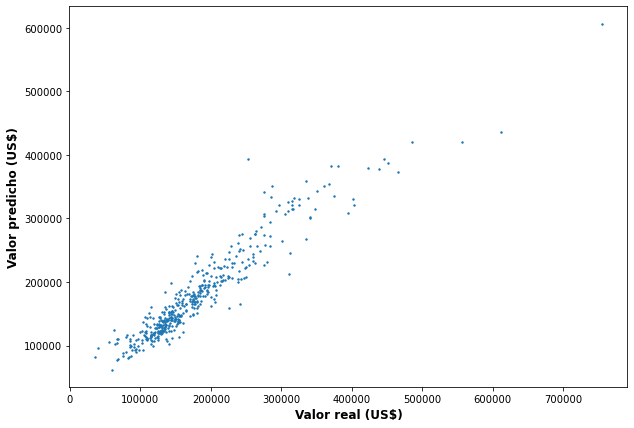

In [135]:
plt.figure(figsize = (10,7))

plt.scatter(y_test,y_test_pred3, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('Valor predicho (US$)', fontweight = "black", fontsize = 12)

### Optimización de hiperparámetros

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

In [72]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200]}

In [73]:
model = GridSearchCV(randomf, param_grid, cv=5)

model.fit(X_train, y_train)

KeyboardInterrupt: 

In [151]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'max_features': 6, 'n_estimators': 167, 'n_jobs': -1, 'random_state': 42}
Mejor Score: 0.8022192067603328



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039804,0.002139,0.020596,0.018707,3,20,-1,42,"{'max_features': 3, 'n_estimators': 20, 'n_job...",0.759520,0.827697,0.768500,0.829069,0.755201,0.787997,0.033255,18
1,0.069009,0.003574,0.015993,0.000886,3,50,-1,42,"{'max_features': 3, 'n_estimators': 50, 'n_job...",0.747206,0.830561,0.744601,0.816521,0.760813,0.779941,0.036296,26
2,0.111984,0.003855,0.019785,0.000742,3,75,-1,42,"{'max_features': 3, 'n_estimators': 75, 'n_job...",0.751464,0.831765,0.749651,0.815494,0.756693,0.781013,0.035250,22
3,0.139001,0.006956,0.022999,0.001094,3,107,-1,42,"{'max_features': 3, 'n_estimators': 107, 'n_jo...",0.755508,0.831706,0.746286,0.804759,0.766386,0.780929,0.032262,23
4,0.136607,0.005346,0.025994,0.001259,3,127,-1,42,"{'max_features': 3, 'n_estimators': 127, 'n_jo...",0.756716,0.832923,0.747744,0.806663,0.766394,0.782088,0.032427,20
5,0.170410,0.003010,0.029393,0.000801,3,147,-1,42,"{'max_features': 3, 'n_estimators': 147, 'n_jo...",0.757940,0.829023,0.749053,0.805275,0.759404,0.780139,0.031339,25
6,0.202728,0.007050,0.033383,0.002870,3,167,-1,42,"{'max_features': 3, 'n_estimators': 167, 'n_jo...",0.758432,0.831361,0.746100,0.804111,0.761363,0.780273,0.032189,24
7,0.166810,0.002321,0.033990,0.001415,3,187,-1,42,"{'max_features': 3, 'n_estimators': 187, 'n_jo...",0.758640,0.831192,0.746991,0.807344,0.763413,0.781516,0.032180,21
8,0.237019,0.009662,0.038992,0.001670,3,220,-1,42,"{'max_features': 3, 'n_estimators': 220, 'n_jo...",0.759408,0.834705,0.747836,0.810485,0.769562,0.784399,0.032841,19
9,0.039810,0.001328,0.011790,0.000744,5,20,-1,42,"{'max_features': 5, 'n_estimators': 20, 'n_job...",0.755101,0.823724,0.735637,0.814792,0.753147,0.776480,0.035692,27


In [152]:
y_train_pred_7 = model.predict(X_train)
y_test_pred_7= model.predict(X_test)
rmse_train = (mean_squared_log_error(y_train, y_train_pred_7))
rmse_test = (mean_squared_log_error(y_test, y_test_pred_7))

print('La precisión del modelo de Random Forest con optimización de hiperparámetros es:', model.score (X_test,y_test))

print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')

La precisión del modelo de Random Forest con optimización de hiperparámetros es: 0.8064526851154994
La raíz del error cuadrático medio en Train es: 0.004578488921374225
La raíz del error cuadrático medio en Test es: 0.026395469456528507


c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Interpretación del modelo

In [132]:
randomf_best = RandomForestRegressor(max_features= 6, n_estimators= 187, n_jobs= -1, random_state= 42)
randomf_best.fit(X_train, y_train)

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(max_features=6, n_estimators=187, n_jobs=-1,
                      random_state=42)

In [140]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': randomf_best.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,OverallQual,0.043490
9,GrLivArea,0.042917
6,TotalBsmtSF,0.041029
15,GarageArea,0.033520
7,1stFlrSF,0.030927
...,...,...
36,1_x,0.000000
222,5_y,0.000000
230,6_x,0.000000
234,3_x,0.000000


### Comprobaremos la performance de una regresión lineal con atributos polinómicos